In [15]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from cnn_utils import *
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.optimizers import Adam


## Data Preprocessing

In [3]:
df = create_dataframe('/../raw_data/dataset_062920.json')
df.head()

,eyeImage,leftEye,rightEye,y
0,"[[[0.49019607843137253, 0.4627450980392157, 0....","[-0.06916704732662149, 0.19730078279591035, -0...","[0.17425771877389162, 0.21639015714266296, 0.2...","[-0.30000000000000004, -0.3019517795637199]"
1,"[[[0.19607843137254902, 0.1607843137254902, 0....","[-0.17658285534307594, 0.18033866676032262, -0...","[0.06629549190581052, 0.1988126179958256, 0.10...","[0.30000000000000004, -0.9012629161882894]"
2,"[[[0.2196078431372549, 0.19215686274509805, 0....","[-0.17382043840055927, 0.17981051564675177, -0...","[0.06089991895895852, 0.18628686237123016, 0.0...","[0.8999999999999999, -0.9012629161882894]"
3,"[[[0.2196078431372549, 0.17647058823529413, 0....","[-0.15968611544730582, 0.18524077990937093, -0...","[0.08123800929222913, 0.1904861112443328, 0.11...","[-0.30000000000000004, 0.8989667049368542]"
4,"[[[0.5882352941176471, 0.5647058823529412, 0.6...","[-0.07825260742468576, 0.16963032408957468, -0...","[0.1666792245722788, 0.19617187288354976, 0.20...","[-0.30000000000000004, 0.2996555683122848]"


In [4]:
len(df)

846

### Try to use Quaternary encoding to see if we have mislabelled data

In [5]:
# randomly select training examples
x_train, x_validation, y_train, y_validation = create_train_validation(df)

# generate binary y labels
# y_train_binary = create_binary_labels(y_train)
# y_validation_binary = create_binary_labels(y_validation) # generate binary y labels

# generate quaternary y labels
y_train_quaternary = create_quaternary_labels(y_train)
y_validation_quaternary = create_quaternary_labels(y_validation) # generate binary y labels


In [6]:
y_validation_quaternary

,y
0,UL
1,UR
7,UR
15,LL
17,LL
...,...
819,UR
821,UL
831,LR
833,LL


In [10]:
# prepare data for feeding in CNN
eyeImage_train, leftEye_train, rightEye_train, quaternary_train = create_tf_data(x_train, y_train_quaternary)
eyeImage_test, leftEye_test, rightEye_test, quaternary_test = create_tf_data(x_validation, y_validation_quaternary)


# encoding the data
# binary_encoder = LabelEncoder()
# binary_encoder.fit(binary_train)
# binary_train = binary_encoder.transform(binary_train)
# binary_test = binary_encoder.transform(binary_test)

# # one-hot encoding the data
# binary_train = to_categorical(binary_train)
# binary_test = to_categorical(binary_test)


In [11]:
quaternary_train

array(['UR', 'LL', 'LL', 'LL', 'LR', 'LL', 'LR', 'LR', 'LR', 'UR', 'UL',
       'UL', 'UL', 'UR', 'LL', 'LL', 'LR', 'UL', 'UL', 'UL', 'UR', 'LR',
       'UR', 'LR', 'LR', 'LR', 'UL', 'LR', 'LL', 'UR', 'UR', 'LL', 'UL',
       'UR', 'UL', 'LL', 'UL', 'UR', 'UL', 'LR', 'UL', 'LL', 'UR', 'UL',
       'LR', 'LL', 'LL', 'LR', 'LL', 'LL', 'UR', 'UR', 'LR', 'UR', 'UL',
       'UL', 'UL', 'LR', 'LR', 'UL', 'LR', 'UR', 'UL', 'LR', 'UL', 'LR',
       'LL', 'UR', 'LR', 'LL', 'UL', 'LL', 'UR', 'UR', 'UL', 'LL', 'UL',
       'UL', 'LL', 'LL', 'LL', 'UL', 'LR', 'UL', 'UL', 'LL', 'UL', 'UL',
       'UR', 'UR', 'LR', 'LL', 'LL', 'LR', 'UL', 'LR', 'LR', 'UR', 'LR',
       'UR', 'LR', 'LL', 'LR', 'LR', 'UL', 'LL', 'LR', 'UR', 'LR', 'UR',
       'LL', 'UL', 'UL', 'UR', 'LL', 'LL', 'UL', 'UR', 'UL', 'UL', 'UR',
       'UL', 'LR', 'LR', 'LL', 'LR', 'LL', 'LL', 'UR', 'LL', 'UL', 'UR',
       'LR', 'LR', 'LL', 'LR', 'UR', 'UR', 'LL', 'UL', 'UL', 'UR', 'UR',
       'LR', 'LL', 'LL', 'LR', 'LL', 'UR', 'UR', 'U

In [12]:
quaternary_encoder = LabelEncoder()
quaternary_encoder.fit(quaternary_train)
quaternary_train = quaternary_encoder.transform(quaternary_train)
quaternary_test = quaternary_encoder.transform(quaternary_test)

# one-hot encoding the data
quaternary_train = tf.keras.utils.to_categorical(quaternary_train)
quaternary_test = tf.keras.utils.to_categorical(quaternary_test)


In [13]:
quaternary_train

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

## Self-defined CNN

In [16]:
# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(units=4, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [19]:
base_learning_rate = 0.0001
adam = Adam(learning_rate=base_learning_rate)
loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction="auto",
    name="categorical_crossentropy",
)

model.compile(optimizer=adam,metrics=['accuracy'],loss = loss)


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 25)      1900      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 25)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 50)        31300     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 70)        31570     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 70)         

In [21]:
history_1= model.fit(
	x = eyeImage_train,
	y = quaternary_train,
    validation_split=0.2,
    batch_size=32,
	epochs=10)



Train on 541 samples, validate on 136 samples
Epoch 1/10
541/541 [==============================] - 15s 27ms/step - loss: 1.5931 - accuracy: 0.2403 - val_loss: 1.3858 - val_accuracy: 0.2206
Epoch 2/10
541/541 [==============================] - 12s 21ms/step - loss: 1.2926 - accuracy: 0.3993 - val_loss: 1.3868 - val_accuracy: 0.2426
Epoch 3/10
541/541 [==============================] - 13s 24ms/step - loss: 1.1606 - accuracy: 0.5028 - val_loss: 1.3892 - val_accuracy: 0.2721
Epoch 4/10
541/541 [==============================] - 12s 21ms/step - loss: 1.0146 - accuracy: 0.5841 - val_loss: 1.3923 - val_accuracy: 0.2206
Epoch 5/10
541/541 [==============================] - 13s 24ms/step - loss: 0.9251 - accuracy: 0.6377 - val_loss: 1.3945 - val_accuracy: 0.2206
Epoch 6/10
541/541 [==============================] - 11s 21ms/step - loss: 0.8366 - accuracy: 0.7024 - val_loss: 1.4004 - val_accuracy: 0.2574
Epoch 7/10
541/541 [==============================] - 10s 19ms/step - loss: 0.7774 - accu

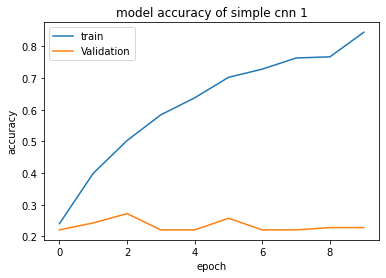

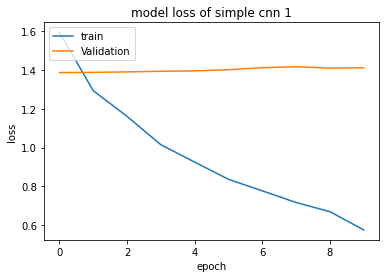

<Figure size 432x288 with 0 Axes>

In [28]:
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy of simple cnn 1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('results/simple_cnn_1_acc.png')

# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss of simple cnn 1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('results/simple_cnn_1_loss.png')


In [23]:
history_2 = model.evaluate(eyeImage_test, quaternary_test)

169/169 [==============================] - 1s 8ms/step


In [27]:
history_2

[1.3893050900577792, 0.2958579957485199]

## Updated version of `create_tf_data`, July 1, 2020
Substract every image from the average image, every landmarks from the average landmarks positions

### Get the mean image of the training dataset

In [21]:
mean_image = np.mean(eyeImage_train, axis = 0)
# meadian_image = np.median(eyeImage_train, axis = 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


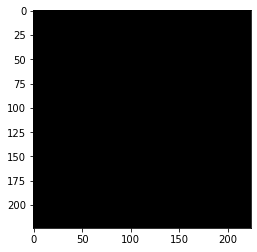

In [22]:
plt.imshow(mean_image)
# plt.savefig("results/average_img.png")

### Updated version of `create_tf_data`

In [23]:
def create_tf_data(X, Y):
    """
    take in the X and Y and transform each column into np array
    Every column in X will be substracted from its mean
    """
    
    eyeImage = np.stack(X['eyeImage'].to_numpy())
    image_mean = np.mean(eyeImage, axis=0)
    eyeImage = eyeImage-image_mean

    leftEye = np.stack(X['leftEye'].to_numpy())
    leftEye_mean = np.mean(leftEye, axis=0)
    leftEye = leftEye-leftEye_mean

    rightEye = np.stack(X['rightEye'].to_numpy())
    rightEye_mean = np.mean(rightEye, axis=0)
    rightEye = rightEye-rightEye_mean

    y = np.stack(Y['y'].to_numpy())
    return eyeImage, leftEye, rightEye, y

### Verify that we substract the mean correctly

In [24]:
_,left,_,_ = create_tf_data(x_train, y_train_binary)

NameError: name 'y_train_binary' is not defined

In [25]:
np.sum(left,axis=0)

NameError: name 'left' is not defined